<div style="border:solid green 2px; padding: 20px">

# Определение перспективного тарифа для телеком-компании

**Описание проекта**

    Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    
    Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
    
**Цель исследования** - определить какой тариф лучше для корректировки рекламного бюджета.
    
**Описание данных**
    
    Путь к файлам:
    /datasets/calls.csv.
    /datasets/internet.csv.
    /datasets/messages.csv.
    /datasets/tariffs.csv.
    /datasets/users.csv.   

О качестве данных ничего не известно. Поэтому перед установкой параметров понадобится обзор данных. 
  
Таблица `users` (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Таблица `calls` (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)    

**Описание тарифов:**

Тариф `«Смарт»`
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.    
    
Тариф `«Ультра»`
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.    
    
`Примечание:`
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
    
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.    
    
**План работы:**
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Общий вывод.
    
</div>   

## Изучение данных из файла
Откроем файлы с данными и изучим общую информацию.

In [1]:
# импорт необходимых библиотек 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# чтение файлов с данными и сохранение

df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv', index_col = 0)
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')



### Таблица `calls` (информация о звонках):

In [3]:
# вывод на экран первых 5 строк датасета
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# изучение общей информации о наборе данных
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# вывод на экран названия столбцов
df_calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [6]:
# подсчёт явных дубликатов
df_calls.duplicated().sum()

0

Чтобы увидеть, какие по длительности звонки абоненты совершают чаще всего, можно построить гистограмму.
В pandas гистограмму строит специальный метод hist() (от англ. histogram — «гистограмма»). 
Применять его можно к списку или к столбцу датафрейма:  во втором случае название столбца передаётся в параметре.
Метод hist() находит в наборе чисел минимальное и максимальное значения, а полученный диапазон делит на области, или корзины.
Затем hist() считает, сколько значений попало в каждую корзину, и отображает это на графике.

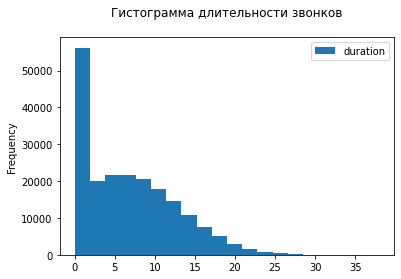

In [7]:
# построим гистограмму длительности звонков
df_calls.plot(kind='hist', y='duration', bins=20)
plt.title('Гистограмма длительности звонков'+ "\n")

plt.show()


In [8]:
# посчитаем звонки с нулевой длительностью 
df_calls['duration'].value_counts().sort_index()[0]


39613

Датасет `df_calls` содержит информацию о звонках. 

В таблице четыре столбца.
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Пропусков и дубликатов в данных нет, 39613 - это звонки с нулевой продолжительностью. Нулями обозначены пропущенные звонки, поэтому не будем их удалять. Такие звонки необходимо округлить в для подсчета выручки.
Необходимо изменить тип данных длительности звонков с float64 на целочисленный int и дату звонков на понятные даты с типом данных datetime64.

### Таблица `internet` (информация об интернет-сессиях):

In [9]:
# вывод на экран первых 5 строк датасета
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [10]:
# изучение общей информации о наборе данных
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [11]:
# вывод на экран названия столбцов
df_internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [12]:
# подсчёт явных дубликатов
df_internet.duplicated().sum()


0

Датасет `df_internet` содержит информацию об интернет-сессиях.

В таблице четыре столбца.
- id — уникальный номер сессии,
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах),
- session_date — дата интернет-сессии,
- user_id — идентификатор пользователя.

Пропусков и дубликатов в данных нет.
Необходимо округлить объём интернет-трафика для правильного расчета выручки, т.к. тарификация происходит за полный мегабайт.
Необходимо изменить тип данных объёма интернет-трафика с float64 на целочисленный int и дату интернет-соединения на понятные даты с типом данных datetime64.

### Таблица `messages` (информация о сообщениях):

In [13]:
# вывод на экран первых 5 строк датасета
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
# изучение общей информации о наборе данных
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
# вывод на экран названия столбцов
df_messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [16]:
# подсчёт явных дубликатов
df_messages.duplicated().sum()

0

Датасет `df_messages` содержит информацию о сообщениях.

В таблице три столбца.

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Пропусков и дубликатов в данных нет. Необходимо изменить тип данных даты отправки сообщения на понятные даты с типом данных datetime64.

### Таблица `users` (информация о пользователях):

In [17]:
# вывод на экран первых 5 строк датасета
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
# изучение общей информации о наборе данных
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
# вывод на экран названия столбцов
df_users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [20]:
# подсчёт явных дубликатов
df_users.duplicated().sum()

0

Датасет `users` содержит информацию о пользователях.

В таблице восемь столбцов.

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Пропусков и дубликатов в данных нет. 38 абонентов приекратили пользоваться тарифом.
Необходимо изменить типы данных дат reg_date и churn_date для упрощения расчётов.
Добавим новый столбец с информацией о длительности пользования тарифами.

## Предобработка данных

### Таблица `calls` (информация о звонках):

In [21]:
# меняем значения в колонке duration с 0 на 1 минуту
#df_calls.loc[df_calls['duration'] == 0, 'duration'] = 1

# округляем длительность звонков и меняем тип данных на целочисленный
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

# перевод даты из объектного типа в тип datetime64 в столбце call_date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# добавляем столбец с категорией месяца
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

# выведем информацию после внесения изменений
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


### Таблица `internet` (информация об интернет-сессиях):

In [22]:
# перевод даты в тип datetime64
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# меняем тип данных на int
df_internet['mb_used'] = df_internet['mb_used'].astype('int')

# добавляем столбец с категорией месяца
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

# выведем информацию после внесения изменений
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.8+ MB


### Таблица `messages` (информация о сообщениях):

In [23]:
# перевод даты в тип datetime64
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

# добавляем столбец с категорией месяца
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

# выведем информацию после внесения изменений
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


### Таблица `users` (информация о пользователях):

In [24]:
# перевод даты в тип datetime64
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

# добавляем столбец с категорией месяца
df_users['month_stop'] = pd.DatetimeIndex(df_users['churn_date']).month
df_users['month_start'] = pd.DatetimeIndex(df_users['reg_date']).month

Узнаем сколько времени абоненты пользовались тарифами, для этого из столбца даты прекращения пользования тарифом вычтем столбец с датой подключения тарифа и добавим расчеты в новый столбец 'use_days'.

In [25]:
# расчет длительности пользования тарифом
df_users['use_days'] = df_users['churn_date'] - df_users['reg_date']

# выведем информацию после внесения изменений
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   user_id      500 non-null    int64          
 1   age          500 non-null    int64          
 2   churn_date   38 non-null     datetime64[ns] 
 3   city         500 non-null    object         
 4   first_name   500 non-null    object         
 5   last_name    500 non-null    object         
 6   reg_date     500 non-null    datetime64[ns] 
 7   tariff       500 non-null    object         
 8   month_stop   38 non-null     float64        
 9   month_start  500 non-null    int64          
 10  use_days     38 non-null     timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(4), timedelta64[ns](1)
memory usage: 43.1+ KB


### Таблица `tariffs` (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Расчитаем объём интернет-трафика, включённого в абонентскую плату (в гигабайтах) и добавим новый столбец с данными 'gb_per_month_included' в таблицу df_tariffs.

In [26]:
# расчёт ежемясчного объема интернет-трафика в гигабайтах и добавление нового столбца
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024
df_tariffs.head()


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


**Посчитаем для каждого пользователя:**

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя

In [27]:
# количество сделанных звонков и израсходованных минут разговора по месяцам
calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [28]:
# количество отправленных сообщений по месяцам
messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages.columns = ['user_id', 'month', 'messages_count']
messages.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [29]:
# объем израсходованного интернет-трафика по месяцам
internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet.columns = ['user_id', 'month', 'mb_sum_internet']
internet.head()

,user_id,month,mb_sum_internet
0,1000,5,2252
1,1000,6,23213
2,1000,7,13988
3,1000,8,14043
4,1000,9,14556


In [30]:
# рассчитаем гигабайты и округлим их в большую сторону
internet['gb_sum_internet'] = np.ceil(internet['mb_sum_internet'] / 1024)

**Расчет помесячной вручки с каждого пользователя:** 

Необходимо объединить таблицы calls и messages для расчета выручки. Для этого необходимо проверить количество id клиентов в каждой таблице для выбора правильного метода соединения таблиц.

In [31]:
# проверяем количество id в таблице о пользователях
len(df_users['user_id'].unique())

500

In [32]:
# проверяем количество id в таблице о сообщениях
len(df_messages['user_id'].unique())

426

In [33]:
# проверяем количество id в таблице о звонках
len(df_calls['user_id'].unique())

492

In [34]:
# проверяем количество id в таблице об интернет-сессиях
len(df_internet['user_id'].unique())

497

- Всего информация представлена о 500 абонентах.
- По сообщениям информация имеется у 426 абонентов.
- По звонкам информация имеется у 492 абонентов.
- По объему интернет-трафика информация имеется у 497 абонентов.

Объединение информации методом merge(), тип слияния outer (от англ. «внешний»). Он объединяет данные из внешней общей области — такие, которые есть хотя бы в одном из датафреймов. Режим объединения задаётся параметром how (от англ. «как, каким образом»). Название столбца, по которому объединять, передают в параметре on, объединим таблицы по двум столбцам 'user_id' и 'month'.

In [35]:
# объединение информации по звонкам и сообщениям методом merge() с параметром параметром how с типом слияния outer  
revenue = calls.merge(messages, on=['user_id', 'month'], how='outer')

# выведем информацию после объединения
revenue.head()

,user_id,month,calls_count,calls_sum,messages_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


In [36]:
# узнаем количетво строк после объединения
len(revenue['user_id'].unique())


498

In [37]:
# присоединим данные об объеме интернет-трафика
revenue = revenue.merge(internet, on=['user_id', 'month'], how='outer')

# выведем информацию после объединения
revenue.head()

,user_id,month,calls_count,calls_sum,messages_count,mb_sum_internet,gb_sum_internet
0,1000,5,22.0,159.0,22.0,2252.0,3.0
1,1000,6,43.0,172.0,60.0,23213.0,23.0
2,1000,7,47.0,340.0,75.0,13988.0,14.0
3,1000,8,52.0,408.0,81.0,14043.0,14.0
4,1000,9,58.0,466.0,57.0,14556.0,15.0


In [38]:
# узнаем количетво строк после объединения
len(revenue['user_id'].unique())

498

Информация представлена не по всем 500 пользователям.

Для расчета выручки добавим в таблицу revenue столбец tariff из таблицы df_users. 
Режим объединения 'left' указывает, что в результат слияния обязательно должны войти все строки из левого датафрейма:

In [39]:
# добавим столбец tariff из таблицы df_users для расчета выручки
revenue = revenue.merge(df_users[['user_id', 'tariff']], on='user_id', how='left')
revenue.head()

,user_id,month,calls_count,calls_sum,messages_count,mb_sum_internet,gb_sum_internet,tariff
0,1000,5,22.0,159.0,22.0,2252.0,3.0,ultra
1,1000,6,43.0,172.0,60.0,23213.0,23.0,ultra
2,1000,7,47.0,340.0,75.0,13988.0,14.0,ultra
3,1000,8,52.0,408.0,81.0,14043.0,14.0,ultra
4,1000,9,58.0,466.0,57.0,14556.0,15.0,ultra


In [40]:
# функция по расчету помесячной вручки с каждого пользователя

def monthly_revenue(row):
    
    money = 0
    
    tariff = row['tariff']
    calls_sum = row['calls_sum']
    messages_count = row['messages_count']
    gb_sum_internet = row['gb_sum_internet']

# считаем разницу между потраченными минутами и объемом услуг включенных в абонентскую плату
    difference_calls = calls_sum - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['minutes_included'])
    
# считаем разницу между потраченными смс и объемом услуг включенных в абонентскую плату   
    difference_messages = messages_count - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['messages_included'])
    
# считаем разницу между потраченным трафиком и объемом услуг включенным в абонентскую плату
    difference_internet = gb_sum_internet - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['gb_per_month_included'])
    
# дополнительная оплата сверхтарифного пакета
    if (difference_calls > 0):
        money += difference_calls * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_minute'])
    if difference_messages > 0:
        money += difference_messages * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_message'])
    if difference_internet > 0:
        money += difference_internet * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_gb'])

# добавление ежемесячной абонентской платы
    money += int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_monthly_fee'])    
    
    return money

# создаем в таблице revenue новый столбец 'monthly_revenue' и добавим в него данные функции 
revenue['monthly_revenue'] = revenue.apply(monthly_revenue, axis=1)
revenue['monthly_revenue'] = revenue['monthly_revenue'].astype('int')

# выведем информацию после вычислений
revenue.head()    

,user_id,month,calls_count,calls_sum,messages_count,mb_sum_internet,gb_sum_internet,tariff,monthly_revenue
0,1000,5,22.0,159.0,22.0,2252.0,3.0,ultra,1950
1,1000,6,43.0,172.0,60.0,23213.0,23.0,ultra,1950
2,1000,7,47.0,340.0,75.0,13988.0,14.0,ultra,1950
3,1000,8,52.0,408.0,81.0,14043.0,14.0,ultra,1950
4,1000,9,58.0,466.0,57.0,14556.0,15.0,ultra,1950


In [41]:
revenue.sample(20)   

,user_id,month,calls_count,calls_sum,messages_count,mb_sum_internet,gb_sum_internet,tariff,monthly_revenue
626,1100,7,90.0,529.0,53.0,17710.0,18.0,smart,1246
1666,1267,12,89.0,636.0,12.0,15952.0,16.0,smart,1158
339,1054,11,88.0,654.0,62.0,15591.0,16.0,smart,1248
1492,1239,12,56.0,471.0,33.0,18993.0,19.0,smart,1350
2878,1454,6,67.0,519.0,23.0,8790.0,9.0,smart,607
1049,1168,12,153.0,1199.0,45.0,29290.0,29.0,ultra,1950
199,1031,12,76.0,562.0,27.0,9779.0,10.0,smart,736
2548,1402,4,105.0,733.0,21.0,24597.0,25.0,ultra,1950
100,1014,5,18.0,102.0,34.0,13031.0,13.0,smart,550
2753,1431,9,33.0,214.0,86.0,15705.0,16.0,smart,858


## Исследовательский анализ данных

Опишем поведение клиентов оператора, исходя из выборки:
- сколько минут разговора
- сколько сообщений
- какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

Посчитаем среднее количество, дисперсию и стандартное отклонение.
Построим гистограммы.
Опишем распределения.

### Анализ длительности разговоров

**Среднее значение длительности разговоров:**

Среднее значение находят методом mean(). Метод pivot_table() группирует данные, а что с ними делать, указывает значение параметра aggfunc. Если параметр aggfunc не указывать, то по умолчанию метод pivot_table()
рассчитает среднее арифметическое значений, указанных в параметре values.

In [42]:
# cредняя длительность телефонных разговоров
revenue.pivot_table(index='tariff', columns='month', values='calls_sum').transpose().describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,387.605810,511.234714
std,72.779777,84.765105
min,203.852941,297.125000
25%,382.304759,486.061958
50%,403.210359,532.430825
75%,428.259435,562.872688
max,479.985119,614.925373


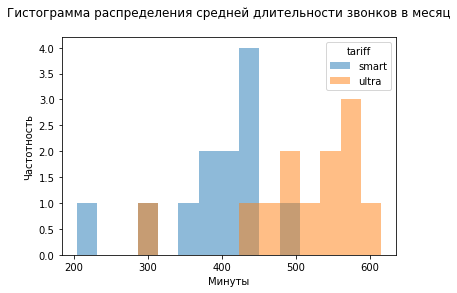

In [43]:
# построим гисторгамму распределения средней длительности звонков в месяц 
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum')
 .transpose()
 .plot(kind='hist', alpha=0.5, bins=15)
)
plt.title('Гистограмма распределения средней длительности звонков в месяц'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()


Средняя длительность разговоров у абонентов тарифа Ultra - 525 больше, чем у абонентов тарифа Smart - 398. Распределение средней длительности разговоров абонентов обоих тарифов с отрицательной скошенностью.

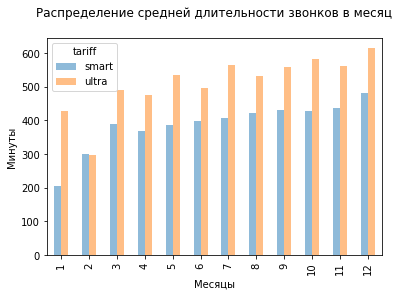

In [44]:
# построим столбчатую диаграмма распределения средней длительности звонков в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum')
 .transpose()
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение средней длительности звонков в месяц'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Минуты')

plt.show()


В течение года показатели обоих тарифов увеличивались. Рост средней длительности разговоров у абонентов тарифа Smart более равномерный в течение года. Показатели тарифа Ultra менее стабильны. В феврале у абонентов обоих тарифных планов самые низкие показатели.

**Стандартное отклонение длительности разговоров:**

Стандартное отклонение находят методом std() (от англ. standard deviation, «стандартное отклонение») из библиотеки NumPy:

In [45]:
# стандартное отклонение длительности телефонных разговоров
revenue.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std').transpose().describe()


tariff,smart,ultra
count,12.000000,12.000000
mean,182.505149,297.702649
std,11.215565,22.922939
min,154.231454,256.976322
25%,178.776114,288.379293
50%,185.680059,296.958672
75%,187.795555,312.255842
max,197.816702,333.743765


Стандартное отклонение длительности разговоров абонентов тарифа Ultra в два раза выше, чем у абонентов Smart.

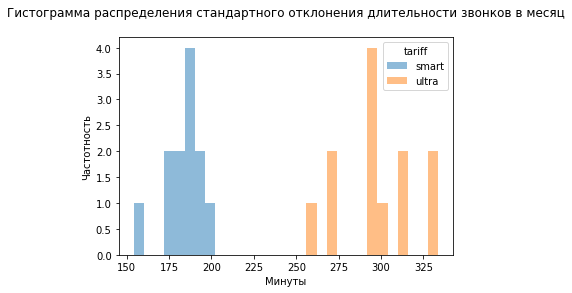

In [46]:
# построим гисторгамму распределения стандартного отклонения длительности разговоров в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std')
 .transpose()
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения длительности звонков в месяц'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()


Распределение стандартного отклонения длительности разговоров абонентов тарифа Smart приближено к нормальному распределению.  

**Дисперсия длительности разговоров.**

Улучшенная метрика разброса — не просто среднее расстояние между значениями датасета и средним, а средний квадрат этого расстояния. Эта величина называется дисперсия (лат. dispersio, «рассеяние»). Квадратный корень из дисперсии — это стандартное отклонение. Дисперсию совокупности рассчитывают методом var() (от англ. variance — «дисперсия»):

In [47]:
# расчитаем дисперсию длительности звонков
revenue.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var').transpose().describe()


tariff,smart,ultra
count,12.000000,12.000000
mean,33423.435954,89108.539728
std,3947.588097,13581.219297
min,23787.341355,66036.830189
25%,31962.854977,83234.993089
50%,34477.738839,88184.651689
75%,35270.219730,97504.728149
max,39131.447539,111384.900901


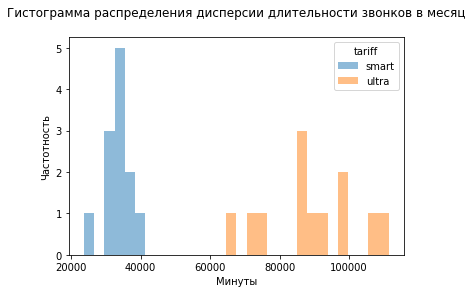

In [48]:
# построим гистограмму распределения дисперсии длительности разговоров в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var')
 .transpose()
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии длительности звонков в месяц'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()

Распределение дисперсии длительности звонков приближено к нормальному распределению. Дисперсия длительности звонков абонентов тарифа Ultra намного больше, чем дисперсия длительности разговоров у абонентов Smart.

### Анализ количества сообщений

**Среднее количество сообщений:**

In [49]:
# расчет среднего количества сообщений
revenue.pivot_table(index='tariff', columns='month', values='messages_count').transpose().describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,36.262730,55.169629
std,6.229501,12.042615
min,20.000000,32.937500
25%,35.786119,46.978205
50%,38.869253,55.605580
75%,39.116941,64.010876
max,42.264808,72.008547


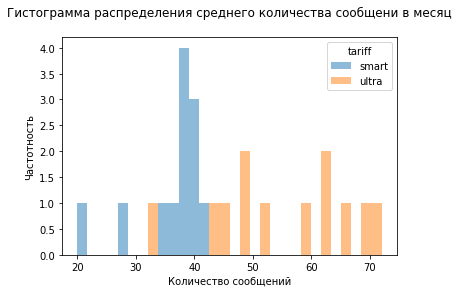

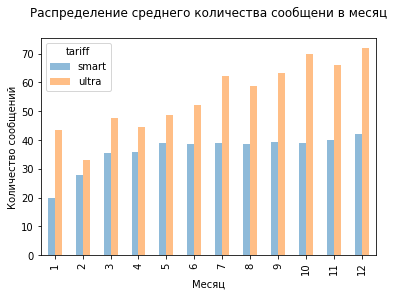

In [50]:
# построим гистограмму распределения среднего количества сообщений в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count')
 .transpose()
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения среднего количества сообщени в месяц'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')

plt.show()

# построим столбчатую диаграмма распределения среднего количества сообщений в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count')
 .transpose()
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение среднего количества сообщени в месяц'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')

plt.show()


В среднем пользователи тарифа Ultra отправляют почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года растёт на обоих тарифах. Динамика отправки сообщений схожа по длительности разговоров: в феврале наименьшее количество сообщений за год, и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.


**Стандартное отклонение количества сообщений:**


In [51]:
# расчет стандартного отклонения количества сообщений
revenue.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std').transpose().describe()


tariff,smart,ultra
count,12.000000,12.000000
mean,25.125986,41.572738
std,3.621369,7.559188
min,15.878707,26.709471
25%,24.644676,39.000073
50%,26.588090,43.831392
75%,27.071223,46.960619
max,28.852160,49.260598


Стандартное отклонение количества сообщений больше у пользователей тарифного плана Ultra — возможно пользователи этого тарифного плана проявляют разную активность.

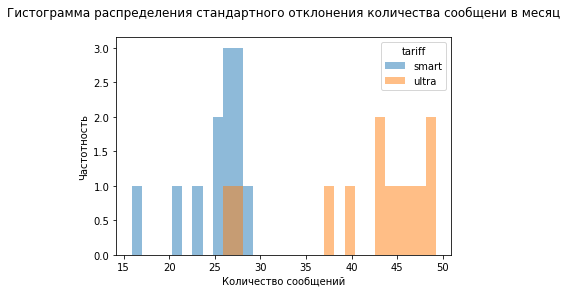

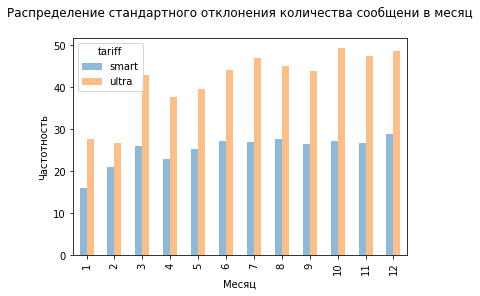

In [52]:
# построим гистограмму распределения стандартного отклонения количества сообщений в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .transpose()
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения количества сообщени в месяц'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')

plt.show()

# построим столбчатую диаграмму распределения стандартного отклонения количества сообщений в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .transpose()
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение стандартного отклонения количества сообщени в месяц'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Частотность')

plt.show()

Распределение стандартного отклонения количества сообщений далеко от нормального. Видно разделение на несколько групп по типу тарифа.


**Дисперсия количества сообщений:**

In [53]:
# расчитаем дисперсию количества сообщений
revenue.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='var').transpose().describe()


tariff,smart,ultra
count,12.000000,12.000000
mean,643.336613,1780.672066
std,162.969953,572.265368
min,252.133333,713.395833
25%,608.548252,1521.729261
50%,706.933460,1921.218134
75%,732.852605,2205.372188
max,832.447114,2426.606511


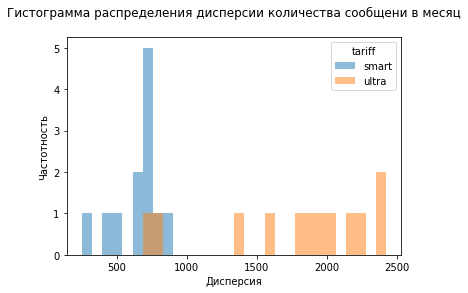

In [54]:
# построим гистограмму распределения дисперсии количества сообщени в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='var')
 .transpose()
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии количества сообщени в месяц'+ "\n")
plt.xlabel('Дисперсия')
plt.ylabel('Частотность')

plt.show()


Дисперсия количества отправленных сообщений в обоих тарифных планах не типична для нормального распределения.

### Анализ объема интернет-сессий

**Средний объем интернет-трафика:**

In [55]:
# расчет среднего объема интернет-сессий
revenue.pivot_table(index='tariff', columns='month', values='gb_sum_internet').transpose().describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,15.187890,18.462806
std,2.623288,2.803642
min,8.735294,13.045455
25%,14.817370,17.427764
50%,15.916321,19.530702
75%,16.793564,20.015854
max,18.181009,21.869565


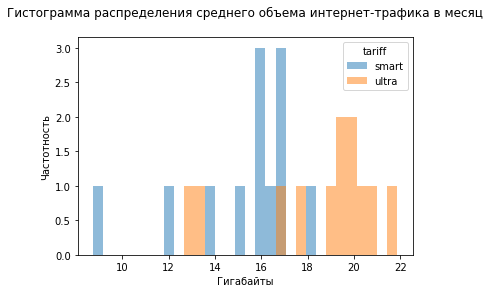

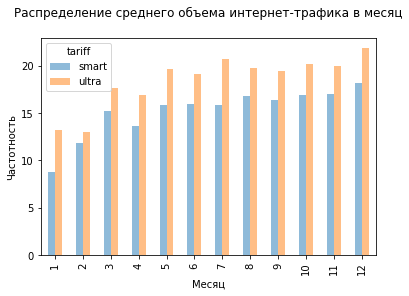

In [56]:
# построим гистограмму распределения среднего объема интернет-сессий в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения среднего объема интернет-трафика в месяц'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')

plt.show()

# построим столбчатую диаграмму распределения среднего объема интернет-сессий в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение среднего объема интернет-трафика в месяц'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Частотность')

plt.show()

Диаграмма размаха тоже хорошо иллюстрирует скошенность данных.

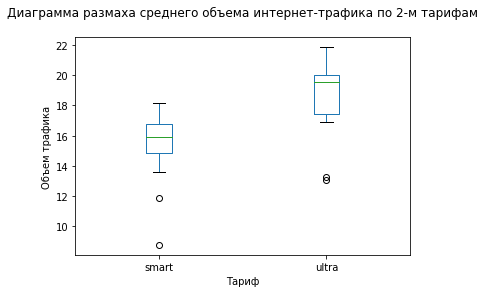

In [57]:
# построим диаграмму размаха распределения среднего объема интернет-сессий в месяц по двум тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха среднего объема интернет-трафика по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Объем трафика')

plt.show()

В среднем абоненты тарифного плана Ultra больше пользуются интернетом, чем  абоненты тарифа Smart. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra — 19-20 ГБ. Меньше всего пользователи использовали интернет в январе, феврале и апреле. Также распределение среднего значения объёма трафика тарифных планов Ultra и Smart ассиметрично, не типично для нормального распределения. Средний объем интернет-трафика тарифа Smart с отрицательной скошенностью частоты значений, а тарифа Ultra с положительной скошенностью.

**Стандартное отклонение объема интернет-трафика:**

In [58]:
# анализ стандартного отклонения объема интернет-трафика
revenue.pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='std').transpose().describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,5.646321,9.441390
std,0.343146,1.002047
min,5.079029,6.666667
25%,5.440123,9.346215
50%,5.672631,9.551782
75%,5.786283,10.052890
max,6.277950,10.675672


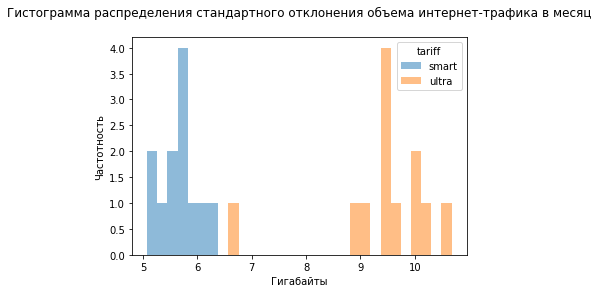

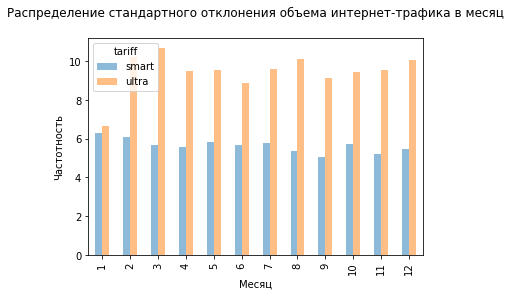

In [59]:
# анализ стандартного отклонения объема интернет-трафика
(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения объема интернет-трафика в месяц'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')

plt.show()

# построим столбчатую диаграмму распределения стандартного отклонения объема интернет-трафика
(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='std')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение стандартного отклонения объема интернет-трафика в месяц'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Частотность')

plt.show()


Показатели объема трафика тарифа Smart менее рассеяны вокруг среднего значения, к тому же среднее отклонение интернет-трафика постепенно уменьшается в течение года, что нельзя сказать о пользователях тарифного плана Ultra.


**Дисперсия объема интернет-трафика:**


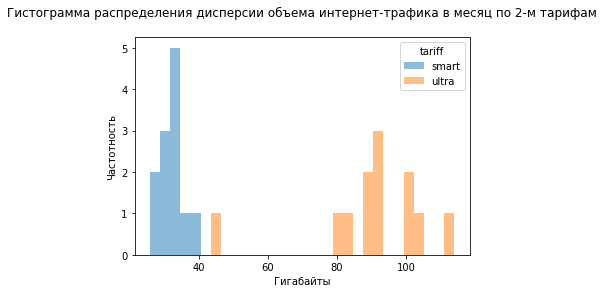

In [60]:
# анализ дисперсии объема интернет-трафика
(revenue
 .pivot_table(index='tariff', columns='month', values='gb_sum_internet', aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')

plt.show()

Дисперсия интернет-трафика тарифа Smart более приближена к нормальному распределению, чем дисперсия тарифа Ultra.

<div style="border:solid green 2px; padding: 20px">
    
**Вывод к анализу данных**

Абоненты тарифного плана Ultra в среднем тратят больше времени на разговоры. В течение года показатели обоих тарифов увеличивались. Рост средней длительности разговоров у абонентов тарифа Smart более равномерный в течение года, а показатели тарифа Ultra менее стабильны, что подтверждает стандартное отклонение длительности разговоров. У абонентов тарифа Ultra оно в два раза выше, чем у абонентов Smart, значит в выборке присутствуют выбивающиеся значения, абоненты тарифа Ultra ведут себя менее предсказуемо. Чтобы оценить разброс значений определили дисперсию. Распределение дисперсии длительности звонков приближено к нормальному распределению. Однако дисперсия длительности звонков абонентов тарифа Ultra намного больше, чем дисперсия длительности разговоров у абонентов Smart.

В среднем пользователи тарифа Ultra отправляют почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года растёт на обоих тарифах. Динамика отправки сообщений схожа по длительности разговоров: в феврале наименьшее количество сообщений за год, и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.
Стандартное отклонение количества сообщений больше у пользователей тарифного плана Ultra — возможно пользователи этого тарифного плана проявляют разную активность. Дисперсия количества отправленных сообщений в обоих тарифных планах не типична для нормального распределения, значения сильно отличаются от среднего с большим разбросом.

В среднем абоненты тарифного плана Ultra больше пользуются интернетом, чем абоненты тарифа Smart. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra — 19-20 ГБ. Меньше всего пользователи использовали интернет в январе, феврале и апреле. Также распределение среднего значения объёма трафика тарифных планов Ultra и Smart ассиметрично, не типично для нормального распределения. Средний объем интернет-трафика тарифа Smart с отрицательной скошенностью частоты значений, а тарифа Ultra с положительной. Показатели объема трафика тарифа Smart менее рассеяны вокруг среднего значения, к тому же среднее отклонение интернет-трафика постепенно уменьшается в течение года, что нельзя сказать о пользователях тарифного плана Ultra.
Дисперсия интернет-трафика тарифа Smart более приближена к нормальному распределению, чем дисперсия тарифа Ultra, значения тарифа Ultra сильно отличаются от среднего, разброс значений выше среднего.
</div> 

## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [61]:
# произведм расчет средней выручки на каждого пользователя
mean_revenue_user = revenue.pivot_table(index='user_id', values='monthly_revenue').reset_index()
mean_revenue_user.columns = ['user_id', 'monthly_revenue_user']
mean_revenue_user.head()


,user_id,monthly_revenue_user
0,1000,1950.000000
1,1001,850.000000
2,1002,1035.714286
3,1003,1950.000000
4,1004,1950.000000


In [62]:
# добавление в  таблицу df_users столбца mean_revenue_user со средней выручкой на каждого пользователя
revenue = revenue.merge(df_users[['user_id', 'city']], on='user_id', how='left')
df_users = df_users.merge(mean_revenue_user, on='user_id', how='left')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,use_days,monthly_revenue_user
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,5,NaT,1950.000000
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaN,11,NaT,850.000000
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,6,NaT,1035.714286
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,NaN,8,NaT,1950.000000
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,5,NaT,1950.000000


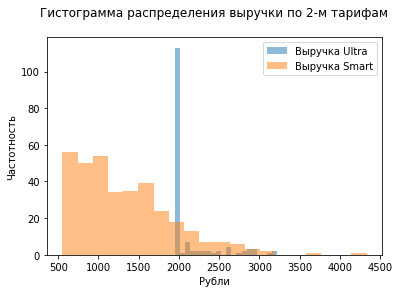

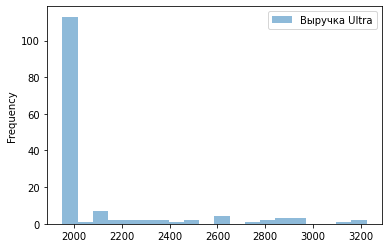

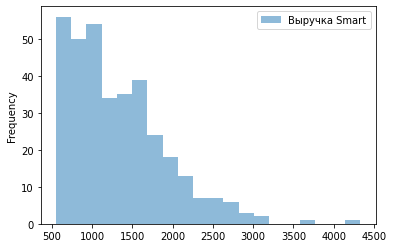

In [63]:
# построим гистограммы распределения выручки по двум тарифам
ax = df_users[df_users['tariff'] == 'ultra'].plot(kind='hist', y='monthly_revenue_user', label='Выручка Ultra', alpha=0.5, bins=20)
df_users[df_users['tariff'] == 'smart'].plot(kind='hist', y='monthly_revenue_user', label='Выручка Smart', ax=ax, alpha=0.5, bins=20)
plt.title('Гистограмма распределения выручки по 2-м тарифам'+ "\n")
plt.xlabel('Рубли')
plt.ylabel('Частотность')

# построим гистограмму распределения выручки тарифа Ultra
df_users[df_users['tariff'] == 'ultra'].plot(kind='hist', y='monthly_revenue_user', label='Выручка Ultra', alpha=0.5, bins=20)

# построим гистограмму распределения выручки тарифа Smart
df_users[df_users['tariff'] == 'smart'].plot(kind='hist', y='monthly_revenue_user', label='Выручка Smart', alpha=0.5, bins=20)

plt.show()


In [64]:
# посмотрим на числовые характеристики выручки по тарифу Ultra 
df_users[df_users['tariff'] == 'ultra']['monthly_revenue_user'].describe()

count     148.000000
mean     2085.932893
std       298.269870
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1990.625000
max      3225.000000
Name: monthly_revenue_user, dtype: float64

Средняя выручка по тарифу Ultra составляет 2087, однако в основном пользователи не выходят за пределы тарифного плана.

In [65]:
# посчитаем сумарную выручку по тарифу Ultra
df_users[df_users['tariff'] == 'ultra']['monthly_revenue_user'].sum()

308718.0681818182

In [66]:
# посчитаем сумарную выручку по тарифу Smart 
df_users[df_users['tariff'] == 'smart']['monthly_revenue_user'].sum()

462509.9310606061

In [67]:
# посмотрим на числовые характеристики выручки по тарифу Smart
df_users[df_users['tariff'] == 'smart']['monthly_revenue_user'].describe()


count     350.000000
mean     1321.456946
std       605.245248
min       550.000000
25%       864.880952
50%      1177.116667
75%      1659.875000
max      4333.333333
Name: monthly_revenue_user, dtype: float64

В среднем пользователи тарифа Ultra чаще всего не выходят за рамки абонентской платы в 1950 рублей. Абоненты Smart наоборот превышают лимиты, установленные в рамках абонентской платы в 550 рублей. Именно у пользователей тарифа Smart отмечена максимальная среднемесячная выручка — 4375 рублей.


**Прверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.**

Проверка гипотез начинается с формулировки нулевой гипотезы H₀ (от англ. hypothesis — «гипотеза»). Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. 


Н0 — средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, т.е. средние значения равны.

Н1 — средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, т.е. средние значения не равны.

Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.

Для проверки гипотезы будет использоваться критерий p-value.
Метод scipy.stats.ttest_1samp() возвращает два числа: статистику разности и уровень значимости для этой статистики — p-value (от англ. p, probability — «вероятность», value — «значение»).


In [68]:
# проверка гипотезы
sample_1 = revenue[revenue['tariff'] == 'ultra']['monthly_revenue'] 
sample_2 = revenue[revenue['tariff'] == 'smart']['monthly_revenue']

results = st.ttest_ind( sample_1, sample_2)
alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение:  2.717446581911462e-162
Принимаем альтернативную гипотезу


P-значение достаточно мало, что даёт основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов, т.е. маловероятна случайность результатов теста гипотезы.


**Прверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Н0 — средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, т.е. средние значения равны.

Н1 — средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, т.е. средние значения не равны.

Для проверки гипотезы будет использоваться критерий p-value.


In [69]:
# проверка гипотезы 
sample_1 = revenue[revenue['city'] == 'Москва']['monthly_revenue'] 
sample_2 = revenue[revenue['city'] != 'Москва']['monthly_revenue']

results = st.ttest_ind( sample_2, sample_1)
alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5357407978453328
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средняя выручка пользователей из Москвы и из других регионов отличается, но с вероятностью в 58% такое различие можно получить случайно. Это слишком высокая вероятность для того, чтобы делать выводы о значимом различии между средними значениями выручки.

## Общий вывод

<div style="border:solid green 2px; padding: 20px">
    
Активность пользователей тарифных планов отличается друг от друга, как показал анализ распределений средних значений и вариативности предоставляемых услуг.

Пользователи тарифа Ultra ведут траты не стабильно, неn четкой тенденции по месяцам. При этом, в среднем пользователи тарифа Ultra чаще всего не выходят за рамки абонентской платы в 1950 рублей — менее четверти клиентов доплачивают за превышение лимитов.

По тарифу Smart чаще всего пользователи превышали лимиты по интернет-трафику, в результате выручка по тарифу Smart была больше, чем по тарифу Ultra. И у абонента этого тарифного плана отмечена максимальная выручка в выборке.

Таким образом, для оператора будет выгоднее тариф Smart с сохранением текущих лимитов по абонентской плате.

       
</div>    